__Data Exploration__

Importing all the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import datetime
import warnings
warnings.filterwarnings('ignore')

Loading csv file data into pandas dataframe named sales_data

In [2]:
sales_data = pd.read_csv('Walmart_Store_sales.csv')
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Checking for any Null values present in any column

In [3]:
sales_data.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

Checking the data types of attributes

In [4]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Describe function is used to find the Descriptive statistics and central tendency, dispersion and shape of a data distribution, ignoring ``NaN`` values if any present.

In [5]:
sales_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Print a breif summary of a DataFrame includes index dtype and column dtypes, non-null values and memory usage.

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-11-01.

The data contains these features:

Store - the store number\
Date - the week of sales\
Weekly_Sales - sales for the given store\
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week\
Temperature - Temperature on the day of sale\
Fuel_Price - Cost of fuel in the region\
CPI – Prevailing consumer price index\
Unemployment - Prevailing unemployment rate

Conversion of Date datatype from object to datetime 

In [7]:
sales_data_df = sales_data.copy()
sales_data_df['Date']= pd.to_datetime(sales_data_df['Date'])

Creating new attributes Month and Year from Date attribute

In [8]:
sales_data_df['Month']=pd.DatetimeIndex(sales_data_df['Date']).month
sales_data_df['Year']=pd.DatetimeIndex(sales_data_df['Date']).year

In [9]:
#Attributes datatypes
sales_data_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int64
Year                     int64
dtype: object

In [10]:
#Descriptive statistics of data
sales_data_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000


Prints the top 5 rows of the dataframe

In [11]:
sales_data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


Univariant Distribution of attributes are ploted as below for both continuous and discrete attributes

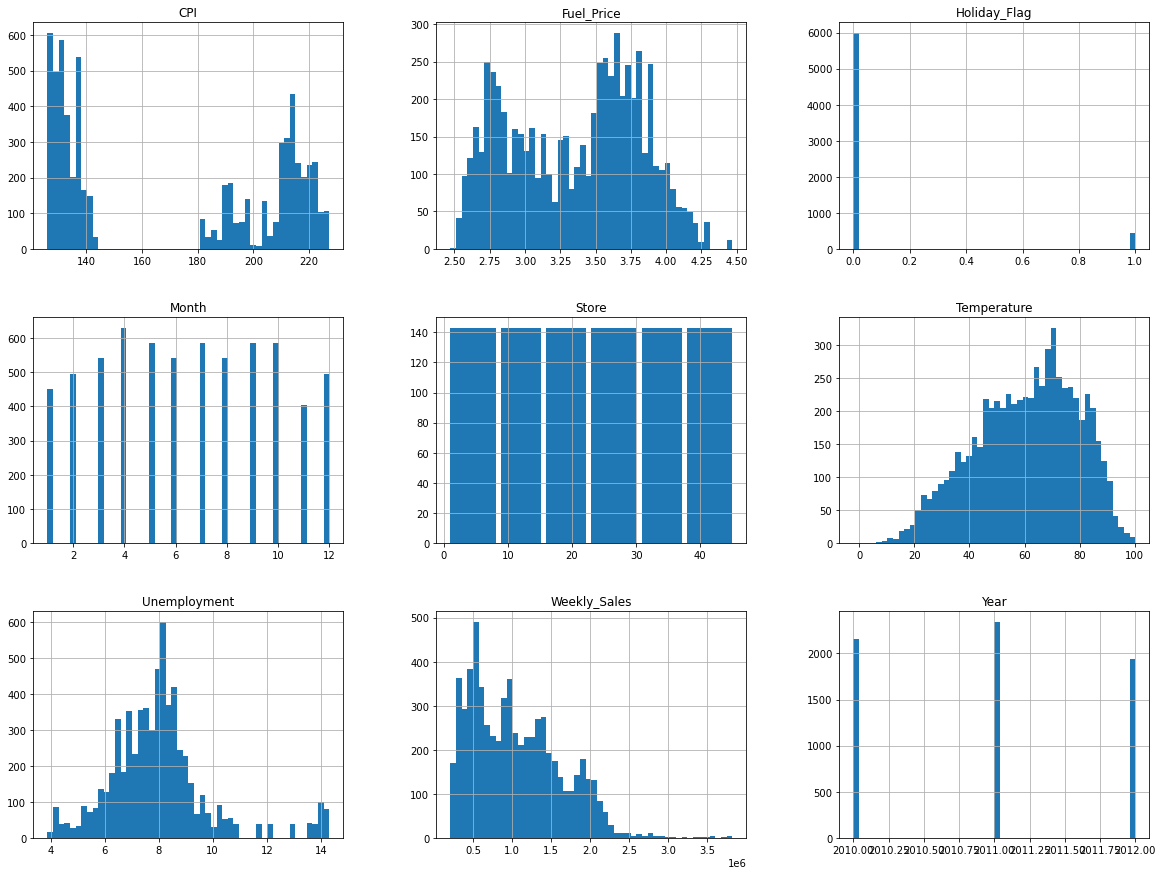

In [12]:
sales_data_df.hist(bins=50, figsize=(20,15))
plt.show()

CPI feature looks bimodal distribution with most of the data lies between 126 to 143 around and no data lies in 143 to 180 range and even for after 180 we have data distribution but frequency is less when compared to range of 126 to 143 cpi values. 

Fuel Price attribute looks clear bimodal distribution with two peaks one is at 2.75 and other is at 3.67 

Holiday Flag has discrete values of 0 and 1 where 0 represents weekday and 1 represents holiday. Most of the data list for weekdays when compared to holidays

Month attribute has only discrete values from 1 to 12 where 4th month i.e., April has most frequency and 11th month i.e., Nov has least frequency in data

Store attribute is discrete with 40 values and it distributed uniformly as all store id frequencies are same.

Temperature attribute is continuous and slightly negatively skewed with 70F peak temp frequency

Unemployment attribute is unimodal with the most frequent value around 8.3

Weekly_sales is right skewed where most of the data lies between 209986 to 250000 and afterwards the variable seems to have outliers.

Year attribute is discrete with 3 values 2010,2011 and 2012 where 2011 has most data and 2012 has least values

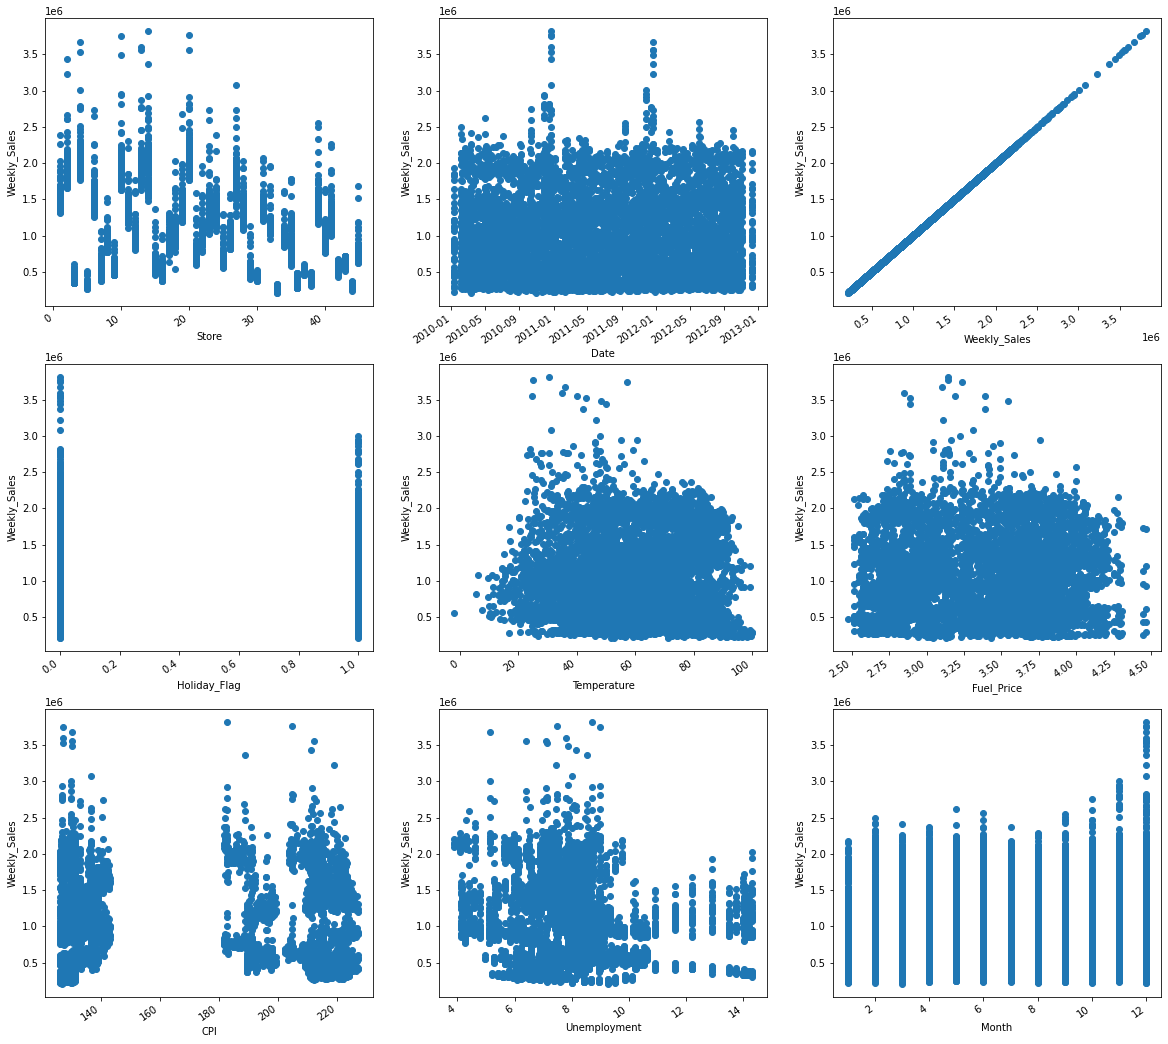

In [13]:
columns=sales_data_df.columns
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
for i in range(0, 3):
    for j in range(0, 3):
        axes[i, j].scatter(sales_data_df[columns[i*3+j]], sales_data_df['Weekly_Sales'])
        axes[i, j].set_xlabel(columns[i*3+j])
        axes[i, j].set_ylabel('Weekly_Sales')
        plt.setp(axes[i,j].get_xticklabels(), rotation=35, horizontalalignment='right')

If we notice in Weekly sales vs store plot the store id's from 0-30 have good weekly sales compared to remaining store ids.

From Weekly sales vs Date plot we noticed that weekly sales is similar for all years except for two weeks which are in 2010 and 2011 christmas month.

From Weekly sales vs Holiday flag plot we can see that non-holidays has more weekly sales than holidays

From Temperature scatter plot when temp is below 20F sales are too less and there is good amount of sales between 20-60F range

It looks like Fuel price and CPI feature are less correlated with weekly sales as it seems they are not effecting much.

when Unemployment rate is high the weekly are less, like after unemployment rate crosses 10 the sales got reduced

From Month and Weekly sales plot we see like in Nov and Dec months weekly sales are high compared to other months because of festivals(Thanksgiving and Christmas)

Below is the plot shows which store id has most and least weekly sales

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

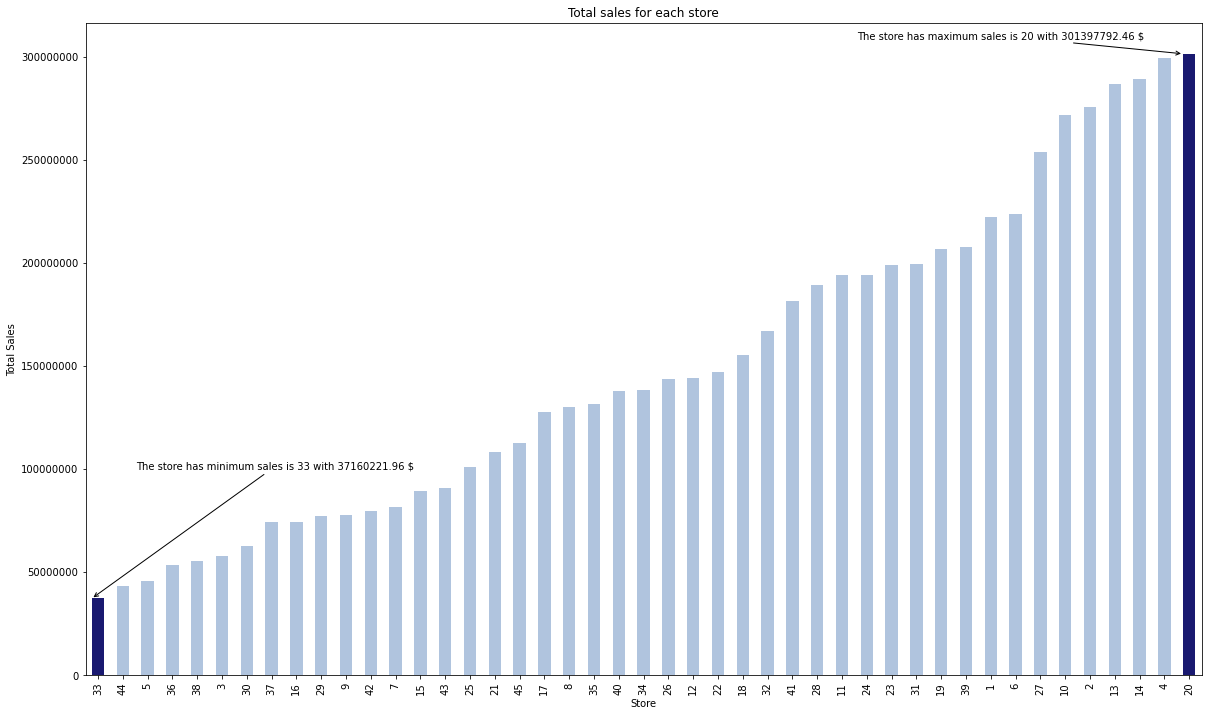

In [14]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each store, then sorted by total sales
total_sales_for_each_store = sales_data_df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);
# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

Below is the plot shows which month has most and least weekly sales

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

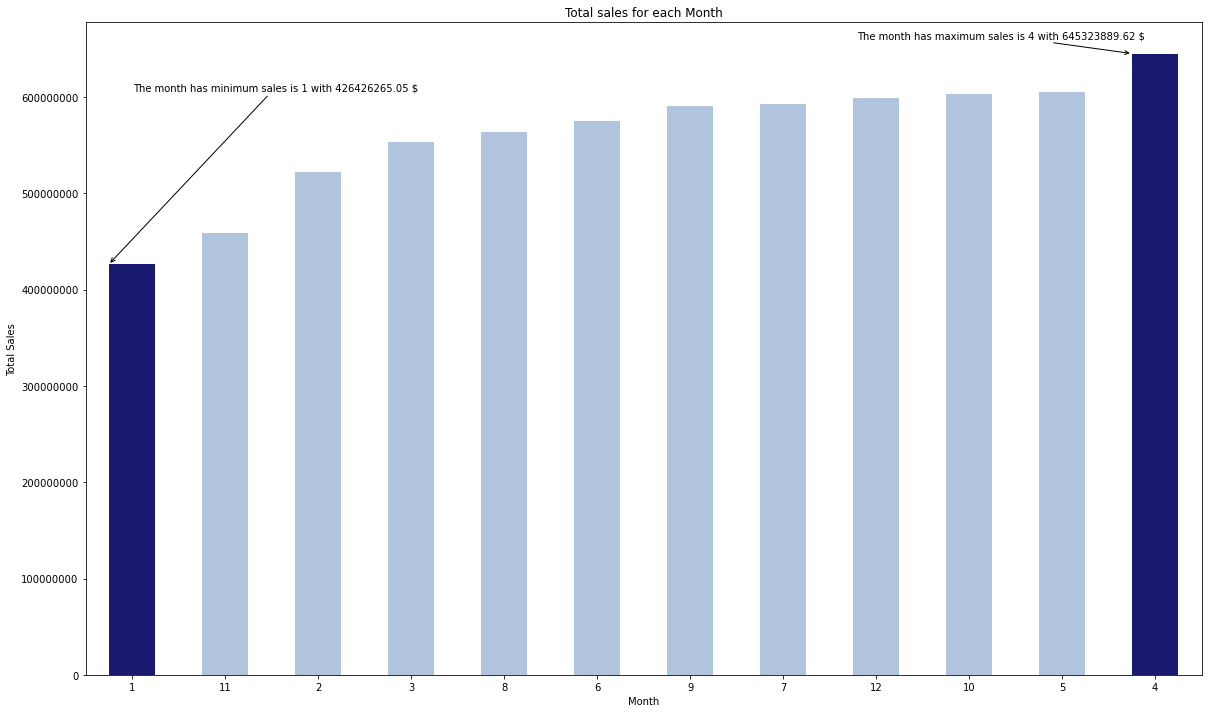

In [15]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each month, then sorted by total sales
total_sales_for_each_month = sales_data_df.groupby('Month')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_month_array = np.array(total_sales_for_each_month) # convert to array

# Assigning a specific color for the months have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_month_array)) and (x > min(total_sales_for_each_month_array))) else 'midnightblue' for x in total_sales_for_each_month_array]


ax = total_sales_for_each_month.plot(kind='bar',color=clrs);

# month have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The month has minimum sales is 1 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Month have maximum sales 
p = ax.patches[11]
ax.annotate("The month has maximum sales is 4 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

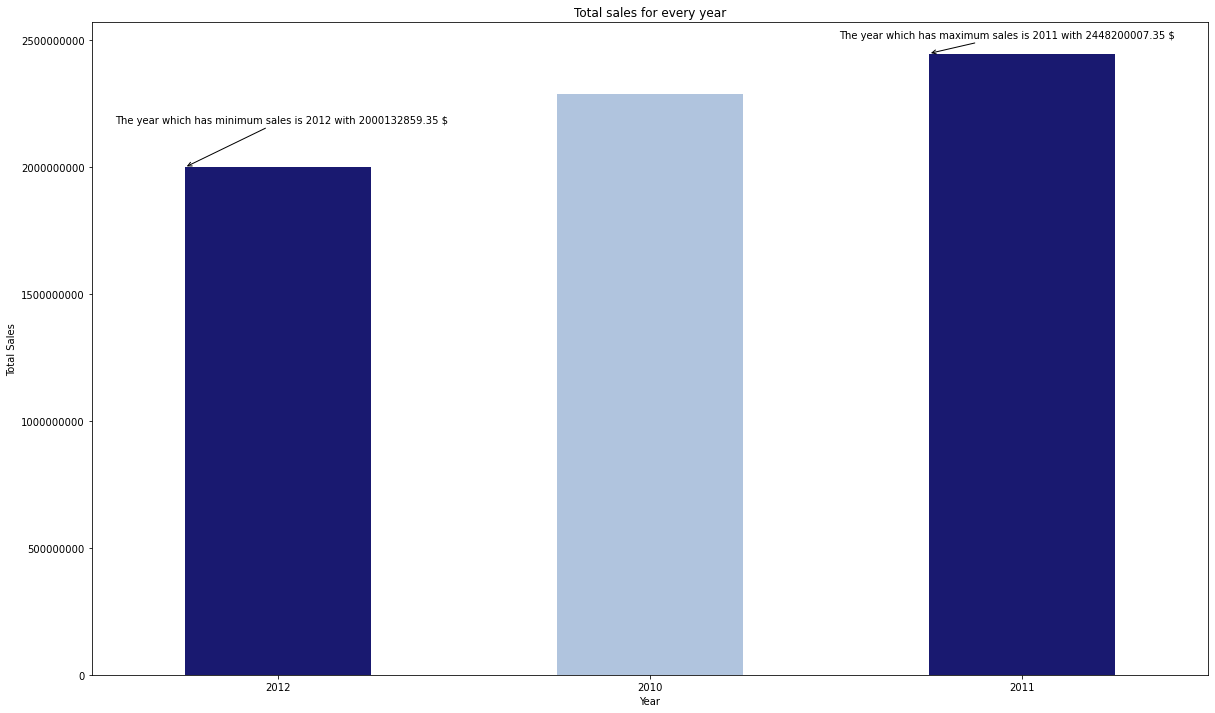

In [16]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each store, then sorted by total sales
total_sales_for_each_year = sales_data_df.groupby('Year')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_year_array = np.array(total_sales_for_each_year) # convert to array

# Assigning a specific color for the year have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_year_array)) and (x > min(total_sales_for_each_year_array))) else 'midnightblue' for x in total_sales_for_each_year_array]


ax = total_sales_for_each_year.plot(kind='bar',color=clrs);

# year have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The year which has minimum sales is 2012 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.85), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# year have maximum sales 
p = ax.patches[2]
ax.annotate("The year which has maximum sales is 2011 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for every year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

We can observe that from above plot that walmart had maximum total sales in 2011 and least tatal sales in 2012

In [17]:
corr_columns =['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
corr_columns

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Plots the pairwise relationships in a data attributes.

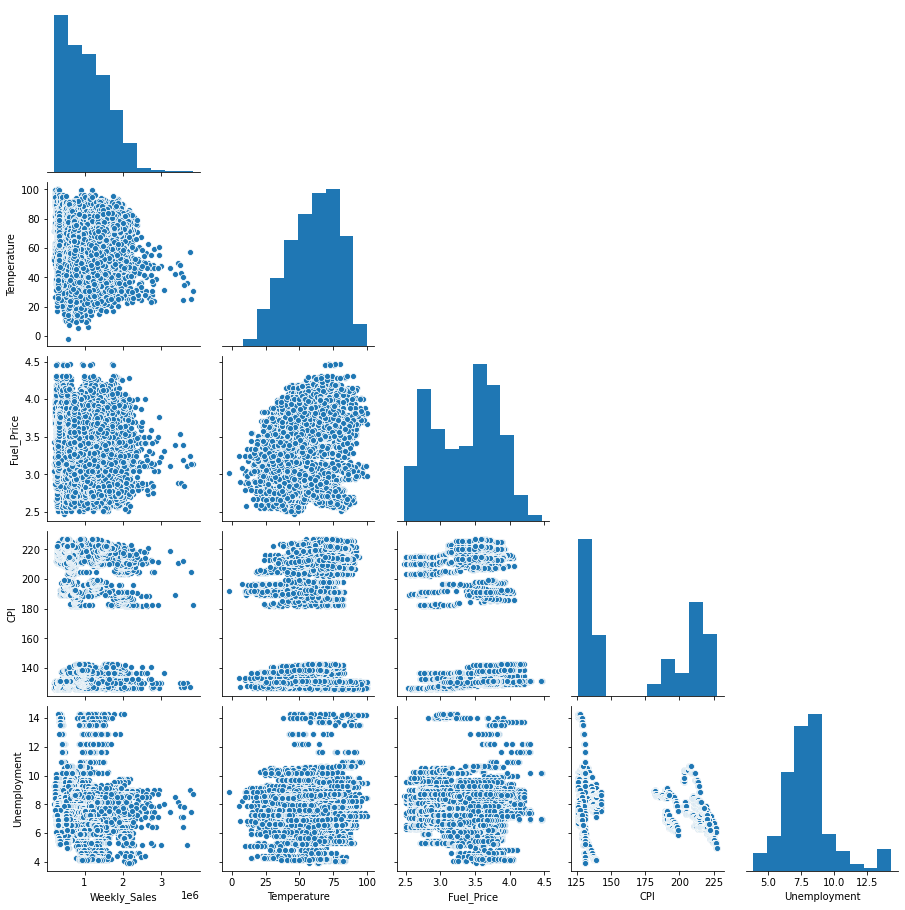

In [18]:
sns.pairplot(sales_data_df[corr_columns],corner=True)

Below Heatmap plots the rectangular data as a color-encoded matrix with different color density range to which represent the correlation values

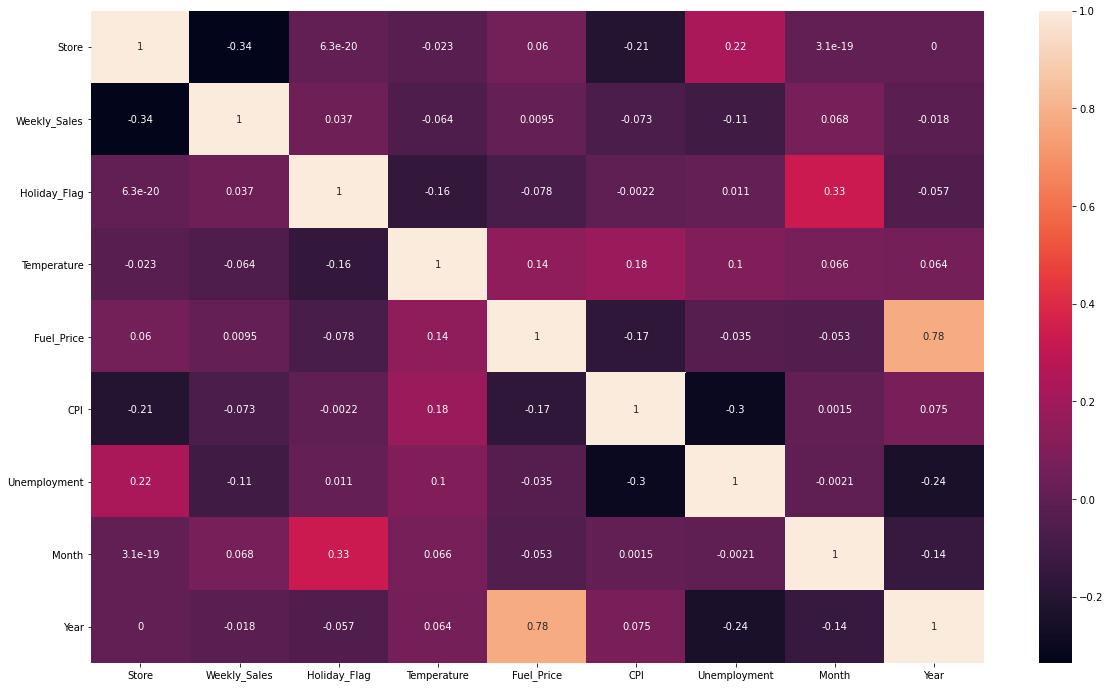

In [19]:
plt.figure(figsize=(20,12))
correlation_df= sales_data_df.corr()
ax = sns.heatmap(correlation_df,annot=True)
plt.show()

Reference:
    https://www.kaggle.com/zarahshibli/retail-analysis-with-walmart-data